In [1]:
from matplotlib import pyplot as plt

In [2]:
def draw_image(image):
    plt.imshow(image)
    plt.show()

In [3]:
import datetime
import numpy as np
import os
import sys
import pickle

FILE_PATH = os.path.abspath('')
sys.path.append(os.path.join(FILE_PATH, '../..'))
sys.path.append(os.path.join(FILE_PATH, '..', 'scripts'))
from demo_baxter_rl_pushing import *

/home/scarab5/anaconda3/envs/robosuite/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/scarab5/anaconda3/envs/robosuite/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/scarab5/anaconda3/envs/robosuite/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/scarab5/anaconda3/envs/robos

In [4]:
screen_width = 192 #264
screen_height = 192 #64
crop = 128
rgbd = True

env = robosuite.make(
    "BaxterPush",
    bin_type='table',
    object_type='cube',
    ignore_done=True,
    has_renderer=True,
    camera_name="eye_on_right_wrist",
    gripper_visualization=False,
    use_camera_obs=False,
    use_object_obs=False,
    camera_depth=True,
    num_objects=2,
    control_freq=100,
    camera_width=screen_width,
    camera_height=screen_height,
    crop=crop
)
env = IKWrapper(env)
env = BaxterEnv(env, task='reach', render=True, using_feature=False, random_spawn=True, rgbd=True, action_type='2D')

Creating window glfw


In [8]:
obs = env.reset()

Creating window glfw
Creating window glfw


In [13]:
camera_obs = env.env.sim.render(
            camera_name='right_hand_camera',
            width=128,
            height=128,
            depth=True,
            #device_id=1,
        )

ValueError: No "camera" with name right_hand_camera exists. Available "camera" names = ('frontview', 'birdview', 'agentview', 'rlview1', 'rlview2', 'eye_on_right_wrist', 'eye_in_hand', 'eye_on_left_wrist').

In [30]:
def get_image(camera_name): # eye_in_hand , right_hand_camera
    camera_obs = env.env.sim.render(
            camera_name=camera_name,
            width=128,
            height=128,
            depth=True,
            #device_id=1,
        )
    return camera_obs

In [58]:
_ = env.step(0)

[ 9.99705843e-01 -2.12871660e-04  9.99855734e-01]


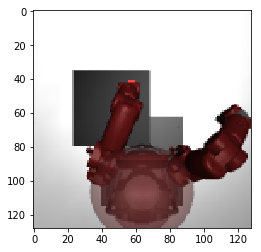

In [59]:
draw_image(get_image('birdview')[0])

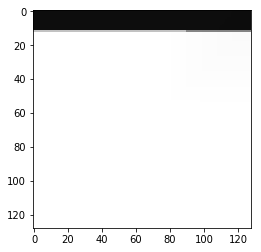

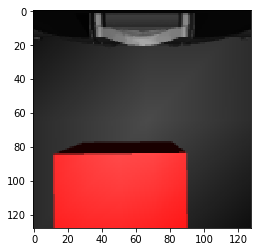

In [60]:
draw_image(get_image('eye_in_hand')[0])
draw_image(get_image('eye_on_right_wrist')[0])

In [51]:
camera_obs[0].shape

(128, 128, 3)

In [17]:
camera_obs[1].shape

(128, 128)

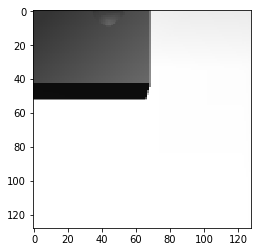

In [18]:
draw_image(camera_obs[0])

In [23]:
env.step(0)

[ 9.99620698e-01 -1.35656997e-04  9.99769720e-01]


([array([[[0.42745098, 0.42745098, 0.42745098, 3.24551773],
          [0.42745098, 0.42745098, 0.42745098, 3.24551773],
          [0.42745098, 0.42745098, 0.42745098, 3.24551773],
          ...,
          [0.45098039, 0.45098039, 0.45098039, 3.24551773],
          [0.45098039, 0.45098039, 0.45098039, 3.24551773],
          [0.45098039, 0.45098039, 0.45098039, 3.24551773]],
  
         [[0.42745098, 0.42745098, 0.42745098, 3.2435627 ],
          [0.42745098, 0.42745098, 0.42745098, 3.2435627 ],
          [0.42745098, 0.42745098, 0.42745098, 3.2435627 ],
          ...,
          [0.45098039, 0.45098039, 0.45098039, 3.2435627 ],
          [0.45098039, 0.45098039, 0.45098039, 3.2435627 ],
          [0.45098039, 0.45098039, 0.45098039, 3.2435627 ]],
  
         [[0.42745098, 0.42745098, 0.42745098, 3.2415843 ],
          [0.42745098, 0.42745098, 0.42745098, 3.2415843 ],
          [0.42745098, 0.42745098, 0.42745098, 3.2415843 ],
          ...,
          [0.45098039, 0.45098039, 0.45098039, 

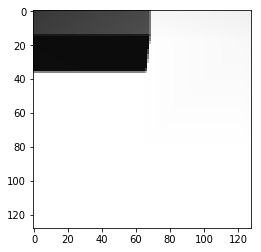

In [26]:
draw_image(camera_obs[0])

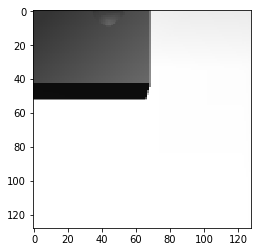

In [24]:
draw_image(camera_obs[0])

In [19]:
env.env.camera_name

'eye_on_right_wrist'

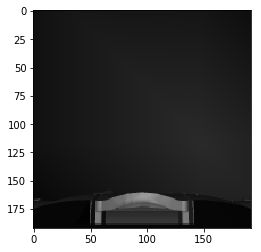

In [20]:
draw_image(env.env.get_image()[0])

In [20]:
env.sim.render()